In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay



## Загрузка данных 


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


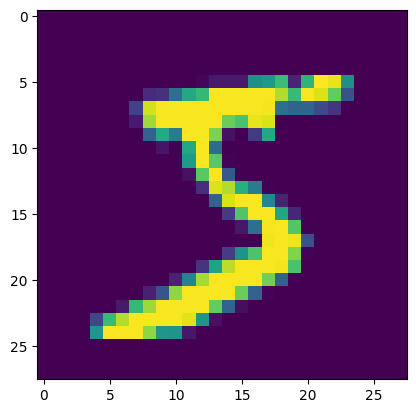

In [2]:
(tr_images, tr_labels), (ts_images, ts_labels) = mnist.load_data()

print(tr_images.shape)
print(tr_labels.shape)
print(ts_images.shape)
print(ts_labels.shape)


plt.imshow(tr_images[0])

In [3]:
val_images = tr_images[-5000:]
val_labels = tr_labels[-5000:]
tr_images = tr_images[:-5000]
tr_labels = tr_labels[:-5000]


print(tr_images.shape)
print(tr_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


## Предобработка данных (preprocessing) 

Для обучения модели, я предварительно настроил данные **(tr_images, val_images и ts_images)**, чтобы нормализовать значения пикселей, приведя их к диапазону от **0 до 1**.

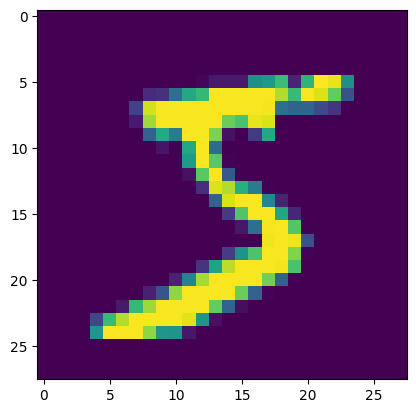

In [4]:
tr_images, val_images, ts_images = tr_images / 255, val_images / 255, ts_images / 255
plt.imshow(tr_images[0])

## Архитектура модели:

### Модель построена с использованием трех полносвязных слоев:

Первый слой **(Flatten)** предназначен для преобразования входных данных (изображений размерности 28x28 пикселей) в одномерный вектор.

Затем следуют два полносвязных слоя **(Dense)** с 128 нейронами в каждом и функцией активации ReLU.

После каждого полносвязного слоя добавлен слой **Dropout** с вероятностью отключения 20%. Dropout помогает справиться с проблемой переобучения **(overfitting)**.

В последнем слое **(Dense)** используется функция активации **softmax** с 10 выходами, соответствующими 10 классам цифр (от 0 до 9).



In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

## Компиляция модели:

Для компиляции модели я выбрал оптимизатор **'adam'**, который является расширением стохастического градиентного спуска (SGD). 

В качестве **loss function** была выбрана **'sparse_categorical_crossentropy'**, поскольку метки целевых классов (labels) представлены в виде целых чисел (0-9), а не one-hot векторов. 

И наконец, для мониторинга производительности модели во время обучения, я указал метрику **'accuracy'**, которая измеряет точность предсказаний модели.


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Обучение модели:

Модель была обучена на данных **tr_images и tr_labels**, с 10 эпох обучения **(epochs)**. Обучение проходило с использованием данных валидации **(val_images и val_labels)**. 

In [7]:
history = model.fit(tr_images, tr_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3250 - accuracy: 0.9025 - val_loss: 0.1060 - val_accuracy: 0.9712
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1538 - accuracy: 0.9532 - val_loss: 0.0840 - val_accuracy: 0.9764
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1193 - accuracy: 0.9630 - val_loss: 0.0673 - val_accuracy: 0.9806
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0993 - accuracy: 0.9695 - val_loss: 0.0746 - val_accuracy: 0.9762
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9719 - val_loss: 0.0687 - val_accuracy: 0.9802
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0777 - accuracy: 0.9751 - val_loss: 0.0682 - val_accuracy: 0.9812
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0706 - accuracy: 0.9778 - val_loss: 0.0740 - val_accuracy:

In [8]:
test_hist = model.evaluate(ts_images, ts_labels)
print(test_hist)

313/313 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9786
[0.07451988756656647, 0.978600025177002]


## Визулизация обучения

Отображение окна с визуализацией графиков потерь(Loss) и точности(Accuracy).

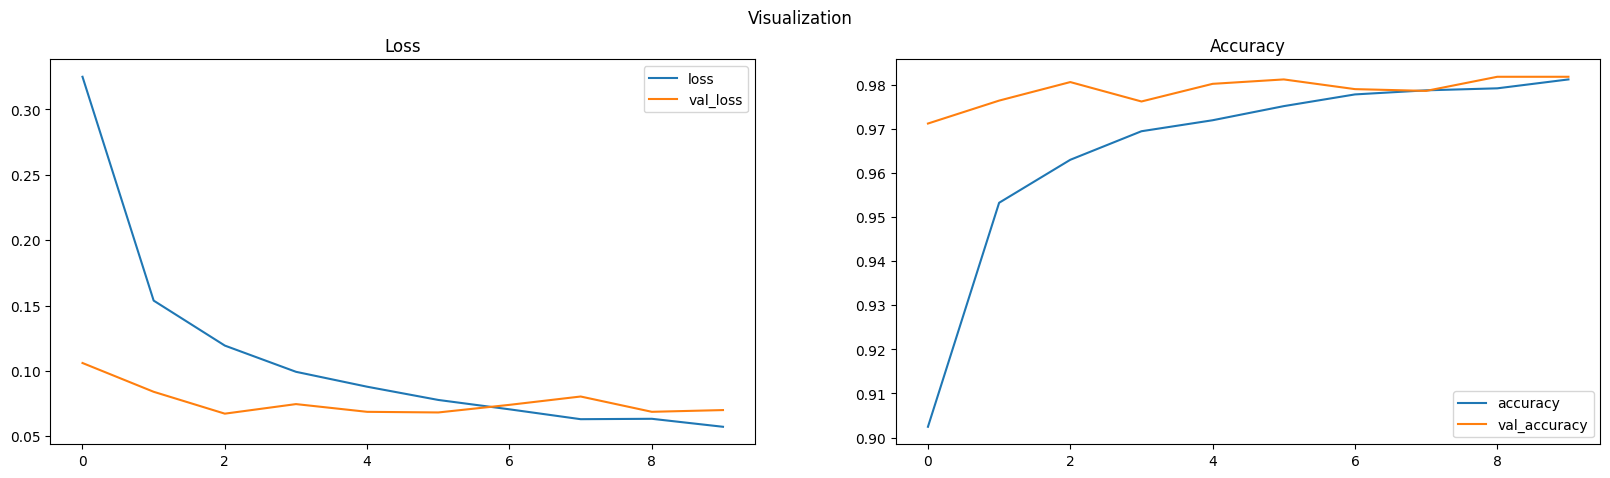

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

plt.suptitle('Visualization')
results = pd.DataFrame(history.history)
results[["loss", 'val_loss']].plot(ax=axs[0])
axs[0].set_title("Loss")
results[["accuracy", "val_accuracy"]].plot(ax=axs[1])
axs[1].set_title("Accuracy")
plt.show()

Отображение окна с визуализацией матрицы ошибок **(confusion matrix)** для оценки производительности модели

313/313 [==============================] - 0s 820us/step


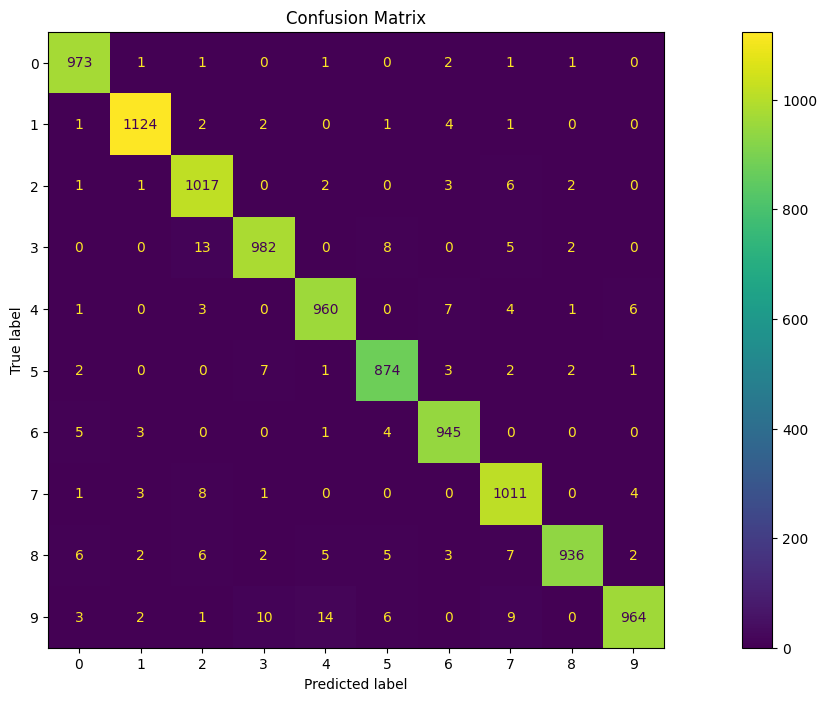

In [10]:
predictions = model.predict(ts_images)
pred_labels = []

for i in predictions:
    pred_labels.append(np.argmax(i))

    
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.set_title("Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(ts_labels, pred_labels, ax=ax)
plt.show()




## Сохранение модели

In [11]:
model.save('mnist_model.h5')

c:\Users\dikha\anaconda3\envs\cv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
